<a href="https://colab.research.google.com/github/signLangProjectNIC/tf-cnn-lstm4/blob/main/tf_cnn_lstm14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.103.58.10:8470']


INFO:tensorflow:Initializing the TPU system: grpc://10.103.58.10:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.103.58.10:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
#lets reduce the overfitting issue in this notebook

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Category:  call.mp4


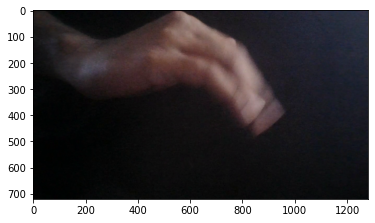

call.mp4
Category:  accident.mp4


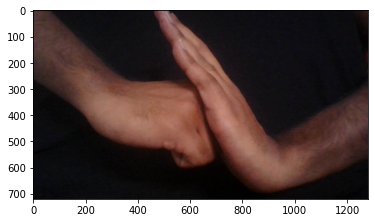

accident.mp4
Category:  doctor.mp4


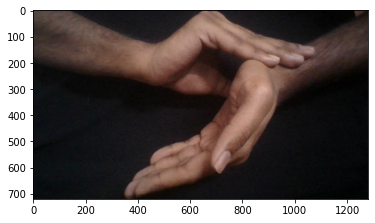

doctor.mp4
Category:  help.mp4


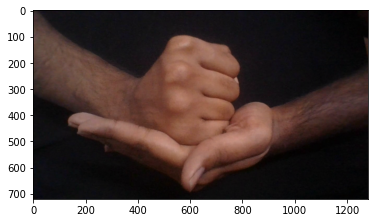

help.mp4
Category:  hot.mp4


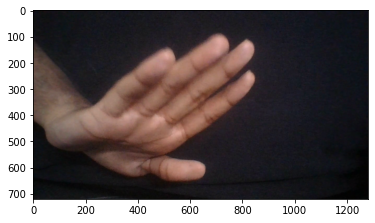

hot.mp4
Category:  lose.mp4


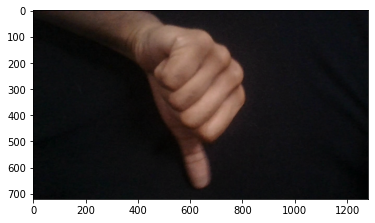

lose.mp4
Category:  pain.mp4


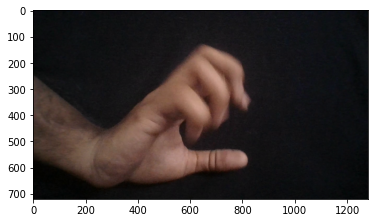

pain.mp4
Category:  thief.mp4


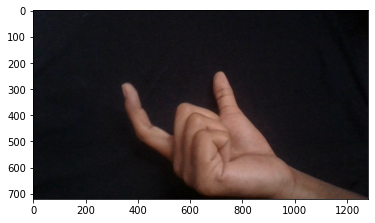

thief.mp4
8
0
(8, 20, 50, 50, 3)
(8, 20, 50, 50, 3)


In [3]:
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
from moviepy.editor import *
import cv2
import moviepy
import sys
nLookback=4
height=50
width=50
channels=3
nCategories=8
def inputData(file1,nFrames=20,frameSize=(50,50)):
    #file1 IS THE FILE THAT CONTAINS THE FOLDERS OF VARIOUS CATEGORIES WITH EACH 
    #EACH CATEGORY CONSISITING OF VARIOUS VIDEOS OF THAT CATEGORY
    # array=np.zeros(shape=(8,52,200,480,640,3),dtype=int)
    i=0
    j=0
    k=0
    array=list()
    y=[]
    for category in os.listdir(file1):
      print("Category: ",category)
      vidPath=os.path.join(file1,category)
      # print(vidPath)
      try:
        vidObj = moviepy.editor.VideoFileClip(vidPath)
      except IOError as e:
        errno, strerror = e.args
        print(errno)
        print(strerror)
      video_duration = int(vidObj.duration) 
      for k in range(nFrames):
        frame=vidObj.get_frame((k+1)*video_duration/(nFrames*1.0))
        if k==10:
          plt.imshow(frame)
          plt.show()
        frameR=Image.fromarray(frame).convert("RGB")
        frame2=frameR.resize(frameSize)
        arrayi=np.array(frame2)
        # print(np.shape(arrayi))
        array.append(arrayi)
      print(category)
      y.append(category)
      i+=1 
    print(i)
    print(j)
    return array,y
from google.colab import drive
drive.mount('/content/gdrive')
testData,y=inputData("/content/gdrive/MyDrive/test videos")
testData=np.asarray(testData).reshape(8,20,50,50,3)
TD=(testData-np.mean(testData))/np.std(testData)
TestSetX=list()
TestSetY=list()
for i in range(nCategories):
  Wholeset=list()
  TestSetX.append(TD[i])
  TestSetY.append(y[i])
print(np.shape(TD))
print(np.shape(TestSetX))
TestSetX=np.reshape(np.asarray(TestSetX),(8,5,4,50,50,3))

In [4]:
print(TestSetY)
testSetYnum={1,0,2,3,4,5,6,7}

['call.mp4', 'accident.mp4', 'doctor.mp4', 'help.mp4', 'hot.mp4', 'lose.mp4', 'pain.mp4', 'thief.mp4']


In [5]:
# {'accident': 0, 'call': 1, 'doctor': 2, 'help': 3, 'hot': 4, 'lose': 5, 'pain': 6, 'thief': 7}

In [11]:
X=np.load("/content/gdrive/MyDrive/hand sign database array X.npy")
Y=np.load("/content/gdrive/MyDrive/hand sign database array Y.npy")
Xmean=np.mean(X)
Xstd=np.std(X)
print(Xmean)
print(Xstd)
X=(X-Xmean)/Xstd
nCategories=8
Xmean=np.mean(X)
Xstd=np.std(X)
print(Xmean)
print(Xstd)
trainSetX=list()
testSetX=list()
trainSetY=list()
testSetY=list()
for i in range(nCategories):
  wholeset=list()
  for j in range(np.shape(Y)[0]):
    if(Y[j]==i):
      wholeset.append(j)
  
  traini,testi=train_test_split(wholeset,test_size=0.22)
  for x in traini:
    trainSetX.append(X[x])
    trainSetY.append(Y[x])
  for x in testi:
    testSetX.append(X[x])
    testSetY.append(Y[x])

76.08792970149254
37.221323957827764
-7.58063079786192e-17
0.9999999999999996


In [12]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfKL
from tensorflow.keras import regularizers
from keras.layers import Activation, Dense 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import random
import pandas as pd

In [13]:
def createModel(layers,metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam'):
  with tpu_strategy.scope():
    model=tf.keras.Sequential()
    for layer in layers:
      model.add(layer)
    model.compile(metrics=metrics,loss=loss,optimizer=optimizer)    
    return model

In [14]:
def evaluateModel(layers,trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam',nSubsequences=5,nLookback=4,nCategories=8,verbose=0,epochs=30,batch_size=10):
  
  with tpu_strategy.scope(): 
    trainX=np.asarray(trainX)
    trainY=np.asarray(trainY)
    valX=np.asarray(valX)
    valY=np.asarray(valY)
    height=trainX.shape[2]
    width=trainX.shape[3]
    channels=trainX.shape[4]
    trainX=trainX.reshape((trainX.shape[0],nSubsequences,nLookback,trainX.shape[2],trainX.shape[3],trainX.shape[4]))
    trainY=tf.keras.utils.to_categorical(trainY)

    
    valX=valX.reshape((valX.shape[0],nSubsequences,nLookback,valX.shape[2],valX.shape[3],valX.shape[4]))
    valY=tf.keras.utils.to_categorical(valY)
  print(np.shape(trainX))
  print(np.shape(trainY))
  print(np.shape(valX))
  print(np.shape(valY))
  with tpu_strategy.scope():
    model=createModel(layers=layers,metrics=metrics,loss=loss,optimizer=optimizer)
    # print(trainX)
    history=model.fit(x=trainX,y=trainY,batch_size=batch_size,epochs=epochs,verbose=verbose,validation_data =(valX,valY))

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
  return model

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/300
31/31 - 16s - loss: 2.2696 - accuracy: 0.3419 - val_loss: 1.8303 - val_accuracy: 0.4565
Epoch 2/300
31/31 - 3s - loss: 1.7423 - accuracy: 0.5065 - val_loss: 1.5888 - val_accuracy: 0.5000
Epoch 3/300
31/31 - 3s - loss: 1.5282 - accuracy: 0.5129 - val_loss: 1.4090 - val_accuracy: 0.5543
Epoch 4/300
31/31 - 3s - loss: 1.3606 - accuracy: 0.6226 - val_loss: 1.3671 - val_accuracy: 0.5761
Epoch 5/300
31/31 - 3s - loss: 1.3314 - accuracy: 0.5806 - val_loss: 1.3369 - val_accuracy: 0.5870
Epoch 6/300
31/31 - 3s - loss: 1.2620 - accuracy: 0.6355 - val_loss: 1.2663 - val_accuracy: 0.7174
Epoch 7/300
31/31 - 3s - loss: 1.2255 - accuracy: 0.6903 - val_loss: 1.2241 - val_accuracy: 0.7500
Epoch 8/300
31/31 - 3s - loss: 1.2217 - accuracy: 0.6548 - val_loss: 1.1857 - val_accuracy: 0.6304
Epoch 9/300
31/31 - 3s - loss: 1.1428 - accuracy: 0.6871 - val_loss: 1.1266 - val_accuracy: 0.6957
Epoch 10/300
31/31 - 3s - loss: 1.0328 - accur

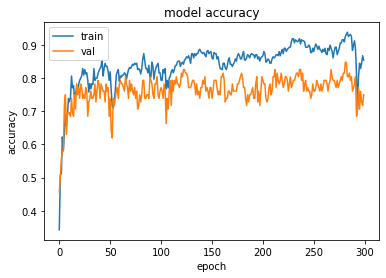

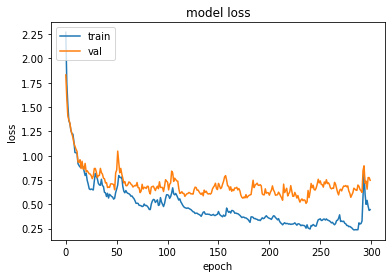

In [ ]:
#lets apply regularization to conv3D layer kernel regulizer of l2 with l2=0.01
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.01)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))
with tpu_strategy.scope(): 
  model=evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=300,verbose=2)
  

In [ ]:
#this has created more zig zag but lets experiment more with regualization of the conv3d thing and actually it seems accuracy has gone up and loss decreased

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/300
31/31 - 16s - loss: 2.2436 - accuracy: 0.3226 - val_loss: 1.7541 - val_accuracy: 0.4348
Epoch 2/300
31/31 - 3s - loss: 1.4213 - accuracy: 0.5355 - val_loss: 1.4588 - val_accuracy: 0.5217
Epoch 3/300
31/31 - 3s - loss: 1.2902 - accuracy: 0.6419 - val_loss: 1.4466 - val_accuracy: 0.5109
Epoch 4/300
31/31 - 3s - loss: 1.2257 - accuracy: 0.6581 - val_loss: 1.3562 - val_accuracy: 0.6413
Epoch 5/300
31/31 - 3s - loss: 1.1793 - accuracy: 0.6484 - val_loss: 1.3026 - val_accuracy: 0.5870
Epoch 6/300
31/31 - 4s - loss: 1.1114 - accuracy: 0.6968 - val_loss: 1.3358 - val_accuracy: 0.5543
Epoch 7/300
31/31 - 3s - loss: 1.1479 - accuracy: 0.6323 - val_loss: 1.2366 - val_accuracy: 0.5652
Epoch 8/300
31/31 - 3s - loss: 1.0564 - accuracy: 0.6613 - val_loss: 1.1735 - val_accuracy: 0.5978
Epoch 9/300
31/31 - 3s - loss: 0.9896 - accuracy: 0.6742 - val_loss: 1.0317 - val_accuracy: 0.7283
Epoch 10/300
31/31 - 3s - loss: 0.9356 - accur

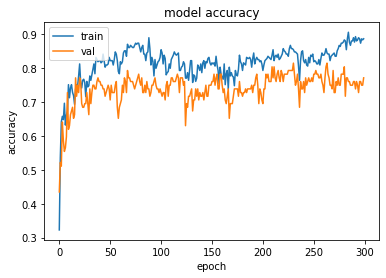

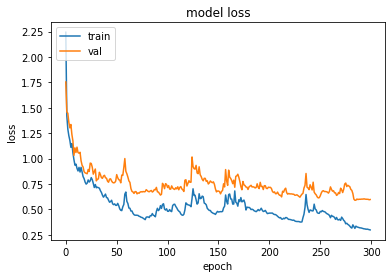

In [ ]:
#lets apply regularization to conv3D layer kernel regulizer of l2 with l2=0.01
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.001)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))
with tpu_strategy.scope(): 
  model=evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=300,verbose=2)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/300
31/31 - 17s - loss: 2.3663 - accuracy: 0.3000 - val_loss: 1.8901 - val_accuracy: 0.4674
Epoch 2/300
31/31 - 3s - loss: 1.6916 - accuracy: 0.5290 - val_loss: 1.5298 - val_accuracy: 0.5435
Epoch 3/300
31/31 - 3s - loss: 1.4037 - accuracy: 0.6097 - val_loss: 1.3997 - val_accuracy: 0.6522
Epoch 4/300
31/31 - 3s - loss: 1.3007 - accuracy: 0.6806 - val_loss: 1.2826 - val_accuracy: 0.6196
Epoch 5/300
31/31 - 3s - loss: 1.2064 - accuracy: 0.6387 - val_loss: 1.1919 - val_accuracy: 0.5978
Epoch 6/300
31/31 - 3s - loss: 1.1698 - accuracy: 0.6806 - val_loss: 1.2683 - val_accuracy: 0.6413
Epoch 7/300
31/31 - 3s - loss: 1.1195 - accuracy: 0.6484 - val_loss: 1.1132 - val_accuracy: 0.6848
Epoch 8/300
31/31 - 3s - loss: 0.9612 - accuracy: 0.7452 - val_loss: 1.0145 - val_accuracy: 0.7065
Epoch 9/300
31/31 - 3s - loss: 0.9715 - accuracy: 0.7677 - val_loss: 1.1004 - val_accuracy: 0.6413
Epoch 10/300
31/31 - 3s - loss: 0.9495 - accur

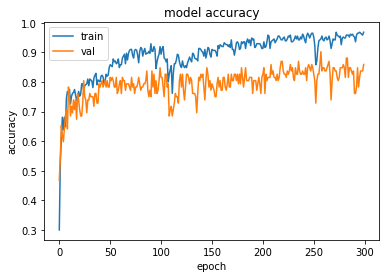

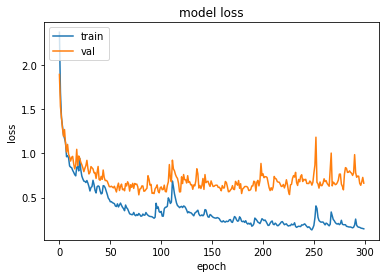

In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.07)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))
with tpu_strategy.scope(): 
  model=evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=300,verbose=2)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/500
31/31 - 17s - loss: 1.9102 - accuracy: 0.4194 - val_loss: 1.5673 - val_accuracy: 0.5217
Epoch 2/500
31/31 - 3s - loss: 1.3714 - accuracy: 0.6355 - val_loss: 1.3617 - val_accuracy: 0.6087
Epoch 3/500
31/31 - 3s - loss: 1.2220 - accuracy: 0.7097 - val_loss: 1.2486 - val_accuracy: 0.6196
Epoch 4/500
31/31 - 3s - loss: 1.1383 - accuracy: 0.7000 - val_loss: 1.2478 - val_accuracy: 0.6304
Epoch 5/500
31/31 - 3s - loss: 1.1375 - accuracy: 0.6871 - val_loss: 1.1549 - val_accuracy: 0.6196
Epoch 6/500
31/31 - 3s - loss: 1.0535 - accuracy: 0.7355 - val_loss: 1.1460 - val_accuracy: 0.6522
Epoch 7/500
31/31 - 3s - loss: 1.0024 - accuracy: 0.7355 - val_loss: 1.0699 - val_accuracy: 0.6522
Epoch 8/500
31/31 - 3s - loss: 0.9525 - accuracy: 0.7355 - val_loss: 1.0467 - val_accuracy: 0.7065
Epoch 9/500
31/31 - 3s - loss: 0.9045 - accuracy: 0.7548 - val_loss: 1.0610 - val_accuracy: 0.5978
Epoch 10/500
31/31 - 3s - loss: 0.9701 - accur

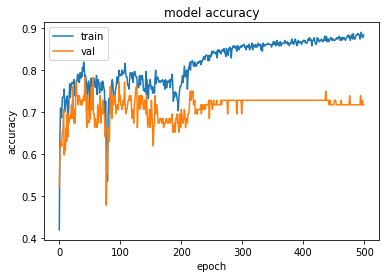

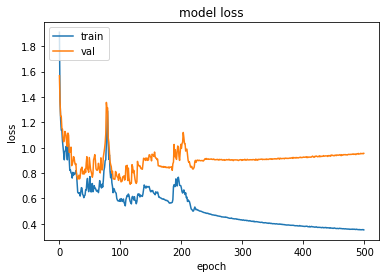

In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))
with tpu_strategy.scope(): 
  model=evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=500,verbose=2)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/500
31/31 - 17s - loss: 2.6200 - accuracy: 0.2226 - val_loss: 2.1241 - val_accuracy: 0.3261
Epoch 2/500
31/31 - 3s - loss: 1.8627 - accuracy: 0.3258 - val_loss: 1.7551 - val_accuracy: 0.3804
Epoch 3/500
31/31 - 3s - loss: 1.5707 - accuracy: 0.4774 - val_loss: 1.5085 - val_accuracy: 0.5000
Epoch 4/500
31/31 - 3s - loss: 1.5137 - accuracy: 0.4548 - val_loss: 1.5402 - val_accuracy: 0.4891
Epoch 5/500
31/31 - 3s - loss: 1.4593 - accuracy: 0.5484 - val_loss: 1.5202 - val_accuracy: 0.4674
Epoch 6/500
31/31 - 3s - loss: 1.3340 - accuracy: 0.5935 - val_loss: 1.4093 - val_accuracy: 0.5543
Epoch 7/500
31/31 - 3s - loss: 1.3055 - accuracy: 0.6032 - val_loss: 1.4249 - val_accuracy: 0.5870
Epoch 8/500
31/31 - 3s - loss: 1.2947 - accuracy: 0.6806 - val_loss: 1.3507 - val_accuracy: 0.6196
Epoch 9/500
31/31 - 4s - loss: 1.2358 - accuracy: 0.7000 - val_loss: 1.3109 - val_accuracy: 0.6304
Epoch 10/500
31/31 - 3s - loss: 1.1829 - accur

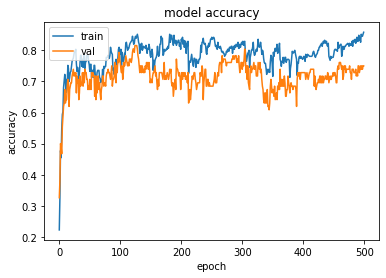

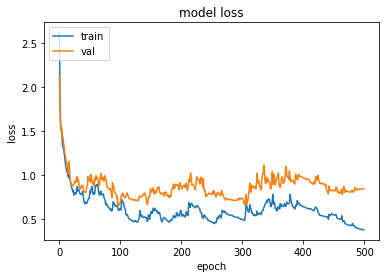

In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.001)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))
with tpu_strategy.scope(): 
  model=evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=500,verbose=2)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/500
31/31 - 17s - loss: 2.2254 - accuracy: 0.2484 - val_loss: 1.8882 - val_accuracy: 0.4239
Epoch 2/500
31/31 - 3s - loss: 1.6496 - accuracy: 0.5452 - val_loss: 1.5158 - val_accuracy: 0.5435
Epoch 3/500
31/31 - 3s - loss: 1.3907 - accuracy: 0.6419 - val_loss: 1.4087 - val_accuracy: 0.5543
Epoch 4/500
31/31 - 3s - loss: 1.3378 - accuracy: 0.6516 - val_loss: 1.4352 - val_accuracy: 0.6304
Epoch 5/500
31/31 - 3s - loss: 1.3168 - accuracy: 0.6387 - val_loss: 1.3104 - val_accuracy: 0.6087
Epoch 6/500
31/31 - 3s - loss: 1.2432 - accuracy: 0.6097 - val_loss: 1.2710 - val_accuracy: 0.6522
Epoch 7/500
31/31 - 3s - loss: 1.3004 - accuracy: 0.6452 - val_loss: 1.4131 - val_accuracy: 0.5870
Epoch 8/500
31/31 - 3s - loss: 1.2338 - accuracy: 0.6710 - val_loss: 1.1958 - val_accuracy: 0.6848
Epoch 9/500
31/31 - 3s - loss: 1.1755 - accuracy: 0.6484 - val_loss: 1.1867 - val_accuracy: 0.5761
Epoch 10/500
31/31 - 4s - loss: 1.0955 - accur

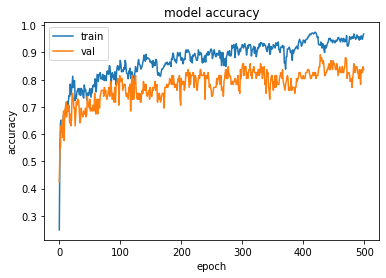

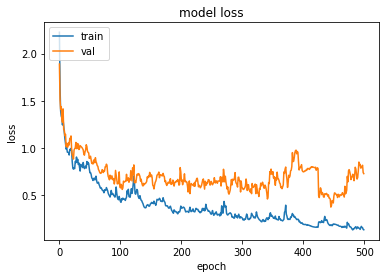

In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.01)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))
with tpu_strategy.scope(): 
  model=evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=500,verbose=2)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/500
31/31 - 17s - loss: 2.5029 - accuracy: 0.3290 - val_loss: 2.2258 - val_accuracy: 0.4239
Epoch 2/500
31/31 - 3s - loss: 2.0245 - accuracy: 0.4742 - val_loss: 1.8672 - val_accuracy: 0.5109
Epoch 3/500
31/31 - 3s - loss: 1.7757 - accuracy: 0.4581 - val_loss: 1.6980 - val_accuracy: 0.5326
Epoch 4/500
31/31 - 3s - loss: 1.5131 - accuracy: 0.5452 - val_loss: 1.5354 - val_accuracy: 0.5109
Epoch 5/500
31/31 - 3s - loss: 1.3771 - accuracy: 0.6065 - val_loss: 1.5441 - val_accuracy: 0.5543
Epoch 6/500
31/31 - 3s - loss: 1.4772 - accuracy: 0.5968 - val_loss: 1.5674 - val_accuracy: 0.4891
Epoch 7/500
31/31 - 3s - loss: 1.3897 - accuracy: 0.5677 - val_loss: 1.3393 - val_accuracy: 0.6087
Epoch 8/500
31/31 - 3s - loss: 1.2692 - accuracy: 0.6806 - val_loss: 1.3711 - val_accuracy: 0.5978
Epoch 9/500
31/31 - 3s - loss: 1.2016 - accuracy: 0.6839 - val_loss: 1.2731 - val_accuracy: 0.6630
Epoch 10/500
31/31 - 3s - loss: 1.1433 - accur

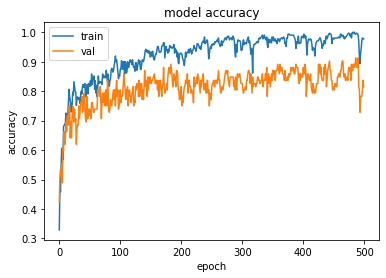

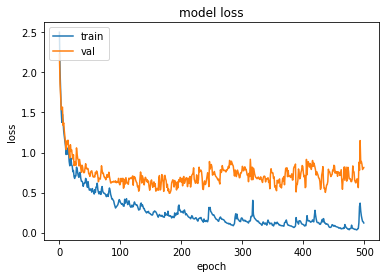

In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.07)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))
with tpu_strategy.scope(): 
  model=evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=500,verbose=2)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/500
31/31 - 17s - loss: 2.8451 - accuracy: 0.2452 - val_loss: 2.3618 - val_accuracy: 0.3152
Epoch 2/500
31/31 - 3s - loss: 2.0920 - accuracy: 0.4097 - val_loss: 2.0076 - val_accuracy: 0.4565
Epoch 3/500
31/31 - 3s - loss: 1.7702 - accuracy: 0.5258 - val_loss: 1.6484 - val_accuracy: 0.5870
Epoch 4/500
31/31 - 3s - loss: 1.6000 - accuracy: 0.5387 - val_loss: 1.5203 - val_accuracy: 0.6413
Epoch 5/500
31/31 - 3s - loss: 1.5594 - accuracy: 0.5419 - val_loss: 1.4417 - val_accuracy: 0.6413
Epoch 6/500
31/31 - 3s - loss: 1.3502 - accuracy: 0.6871 - val_loss: 1.3676 - val_accuracy: 0.6087
Epoch 7/500
31/31 - 3s - loss: 1.2969 - accuracy: 0.6871 - val_loss: 1.3295 - val_accuracy: 0.6739
Epoch 8/500
31/31 - 3s - loss: 1.2579 - accuracy: 0.6903 - val_loss: 1.2476 - val_accuracy: 0.7283
Epoch 9/500
31/31 - 3s - loss: 1.1576 - accuracy: 0.6581 - val_loss: 1.1240 - val_accuracy: 0.6848
Epoch 10/500
31/31 - 3s - loss: 1.0584 - accur

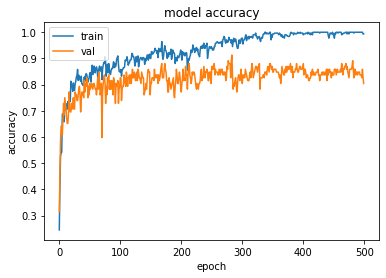

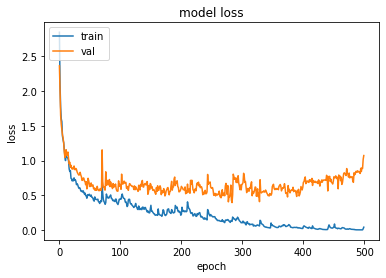

In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.1)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))
with tpu_strategy.scope(): 
  model=evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=500,verbose=2)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/500
31/31 - 17s - loss: 3.0788 - accuracy: 0.2000 - val_loss: 2.3502 - val_accuracy: 0.2826
Epoch 2/500
31/31 - 4s - loss: 2.0241 - accuracy: 0.4516 - val_loss: 1.7993 - val_accuracy: 0.5000
Epoch 3/500
31/31 - 3s - loss: 1.6348 - accuracy: 0.5161 - val_loss: 1.5779 - val_accuracy: 0.5000
Epoch 4/500
31/31 - 3s - loss: 1.4741 - accuracy: 0.5581 - val_loss: 1.4975 - val_accuracy: 0.5000
Epoch 5/500
31/31 - 3s - loss: 1.4238 - accuracy: 0.5742 - val_loss: 1.3728 - val_accuracy: 0.6413
Epoch 6/500
31/31 - 3s - loss: 1.3633 - accuracy: 0.6581 - val_loss: 1.3311 - val_accuracy: 0.6304
Epoch 7/500
31/31 - 3s - loss: 1.2904 - accuracy: 0.6645 - val_loss: 1.2683 - val_accuracy: 0.6630
Epoch 8/500
31/31 - 3s - loss: 1.1990 - accuracy: 0.6613 - val_loss: 1.2643 - val_accuracy: 0.5978
Epoch 9/500
31/31 - 3s - loss: 1.2709 - accuracy: 0.6194 - val_loss: 1.2580 - val_accuracy: 0.6413
Epoch 10/500
31/31 - 3s - loss: 1.0994 - accur

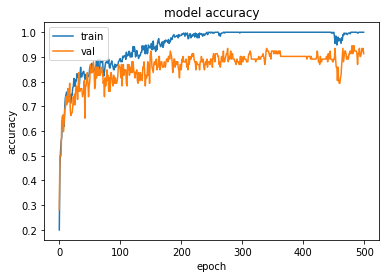

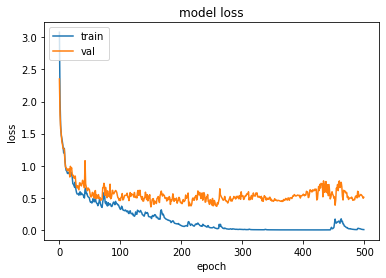

In [15]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.2)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))
with tpu_strategy.scope(): 
  model=evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=500,verbose=2)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/500
31/31 - 17s - loss: 3.0992 - accuracy: 0.2419 - val_loss: 2.5737 - val_accuracy: 0.2065
Epoch 2/500
31/31 - 3s - loss: 2.1779 - accuracy: 0.3935 - val_loss: 1.8876 - val_accuracy: 0.5761
Epoch 3/500
31/31 - 3s - loss: 1.7896 - accuracy: 0.5226 - val_loss: 1.7470 - val_accuracy: 0.5217
Epoch 4/500
31/31 - 3s - loss: 1.6174 - accuracy: 0.5452 - val_loss: 1.4874 - val_accuracy: 0.6304
Epoch 5/500
31/31 - 3s - loss: 1.4557 - accuracy: 0.6161 - val_loss: 1.5074 - val_accuracy: 0.5978
Epoch 6/500
31/31 - 3s - loss: 1.4412 - accuracy: 0.5806 - val_loss: 1.3663 - val_accuracy: 0.6739
Epoch 7/500
31/31 - 3s - loss: 1.3694 - accuracy: 0.6355 - val_loss: 1.4061 - val_accuracy: 0.5761
Epoch 8/500
31/31 - 3s - loss: 1.2954 - accuracy: 0.6419 - val_loss: 1.1891 - val_accuracy: 0.6848
Epoch 9/500
31/31 - 3s - loss: 1.2433 - accuracy: 0.6452 - val_loss: 1.2013 - val_accuracy: 0.6413
Epoch 10/500
31/31 - 3s - loss: 1.2242 - accur

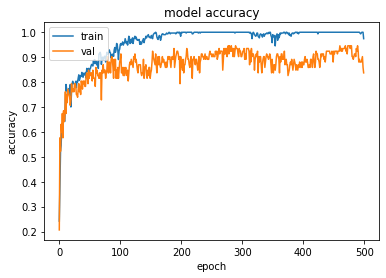

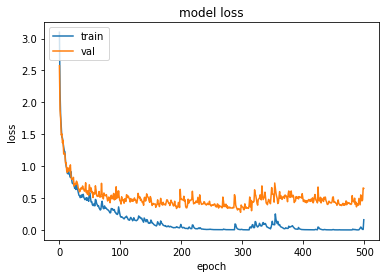

In [16]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))
with tpu_strategy.scope(): 
  model=evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=500,verbose=2)
  